<a href="https://colab.research.google.com/github/danon6868/blastim-ml/blob/main/statistics_day_9/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_3_%D0%94%D0%B5%D0%BD%D1%8C_9_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_2_%D0%9A%D0%BB%D0%B0%D1%81%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = 12, 9
plt.rcParams["font.size"] = 14

# Данные по экспрессиям B и NK клеток

Данные можно скачать по [ссылке](https://drive.google.com/file/d/1j-NEMWgFI4zh9ebVi6r657CjbrPA6gk7/view?usp=drive_link).

In [3]:
path_to_data = "drive/MyDrive/teaching/blastim-ml/statistics-day-9/immune_cells_data.csv"
data = pd.read_csv(path_to_data, index_col=0)
data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [5]:
data["Cell_type"].value_counts()

B_cell     500
NK_cell    500
Name: Cell_type, dtype: int64

In [6]:
example_gene = "TMCC1"

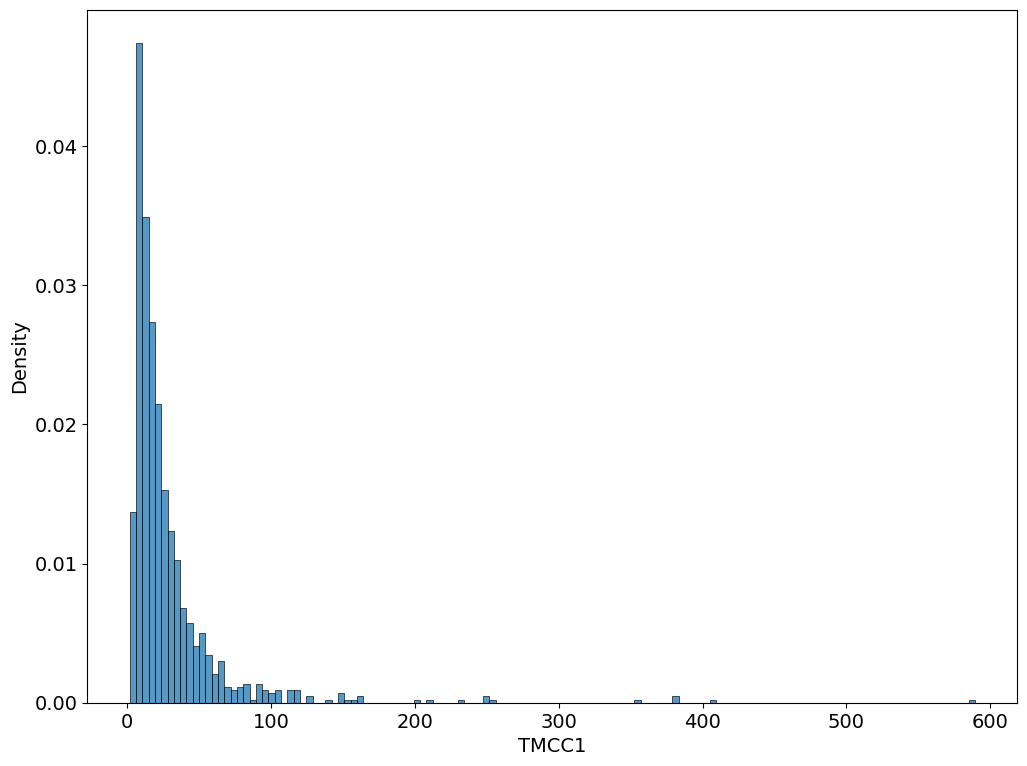

In [7]:
sns.histplot(data[example_gene], stat="density");

In [8]:
from scipy.stats import shapiro

In [9]:
shapiro(data[example_gene])

ShapiroResult(statistic=0.4790947437286377, pvalue=0.0)

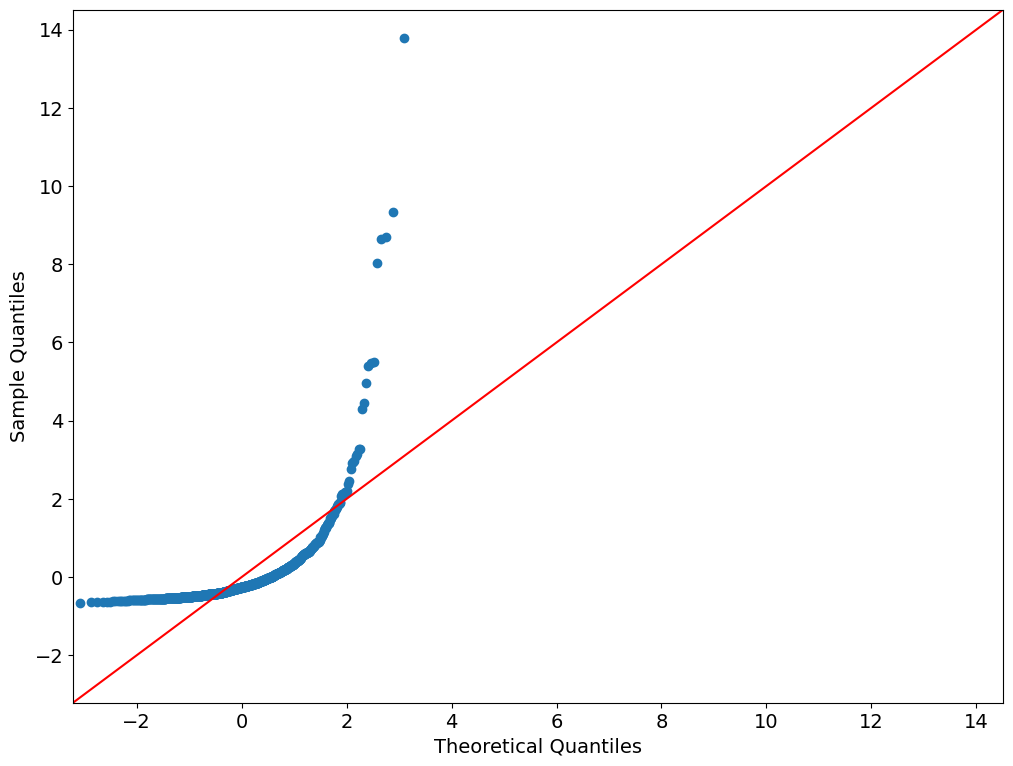

In [10]:
import statsmodels.api as sm

values = (data[example_gene] - data[example_gene].mean()) / data[example_gene].std()
sm.qqplot(values, line="45");

In [13]:
b_cells = data.query("Cell_type == 'B_cell'").drop("Cell_type", axis=1)
nk_cells = data.query("Cell_type == 'NK_cell'").drop("Cell_type", axis=1)

## Потестируем что-то

In [16]:
from scipy.stats import ttest_ind, mannwhitneyu

In [17]:
alpha = 0.05

In [18]:
_, p_values_ttest = ttest_ind(b_cells, nk_cells)

In [21]:
(p_values_ttest < alpha).sum()

5276

In [22]:
_, p_values_mwu = mannwhitneyu(b_cells, nk_cells)

In [23]:
(p_values_mwu < alpha).sum()

10532

In [25]:
de_ttest = b_cells.columns[(p_values_ttest < alpha)]
de_mwu = b_cells.columns[(p_values_mwu < alpha)]

In [24]:
from matplotlib_venn import venn2

In [28]:
common_genes = np.intersect1d(de_ttest, de_mwu)
ttest_unique_genes = np.setdiff1d(de_ttest, de_mwu)
mwu_unique_genes = np.setdiff1d(de_mwu, de_ttest)

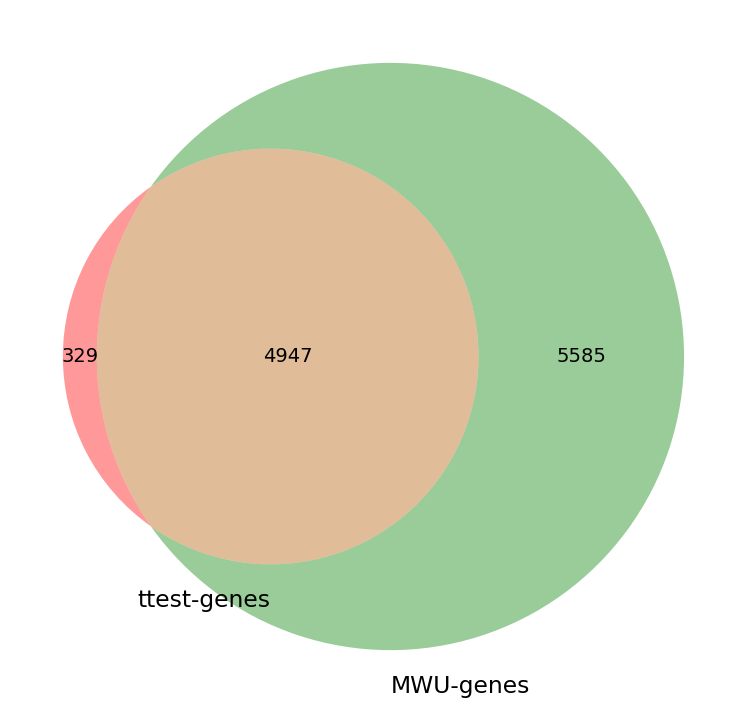

In [30]:
venn2(subsets=(len(ttest_unique_genes), len(mwu_unique_genes), len(common_genes)),
      set_labels=("ttest-genes", "MWU-genes"));

## Множественные сравнения

[Документация](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

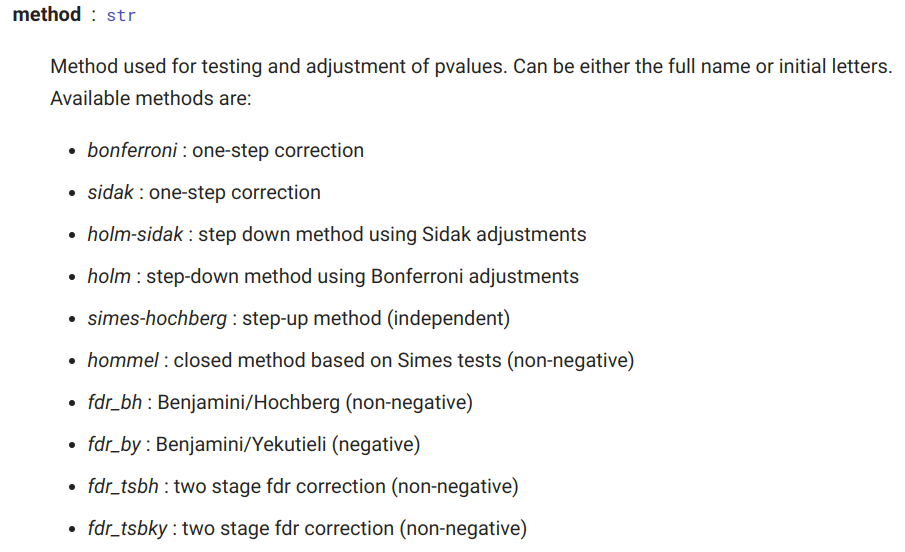

In [31]:
from statsmodels.stats.multitest import multipletests

In [36]:
_, bonf_corr_ttest_pvals, _, _ = multipletests(p_values_ttest, method="bonferroni")

In [38]:
(bonf_corr_ttest_pvals < alpha).sum()

1911

In [39]:
_, bonf_corr_mwu_pvals, _, _ = multipletests(p_values_mwu, method="bonferroni")

In [40]:
(bonf_corr_mwu_pvals < alpha).sum()

5104